In [1]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

import warnings   # To avoid warning messages in the code run
warnings.filterwarnings("ignore")

In [2]:
# The data, split between train and test sets:
(x_train_, y_train_), (x_test_, y_test_) = cifar10.load_data()
# delete C:/Users/Your_UserName/.keras/datasets/
print('x_train_ shape:', x_train_.shape)
print('x_test_ shape:', x_test_.shape)
print('y_train_ shape:', y_train_.shape)
print('y_test_ shape:', y_test_.shape)
print('y_train_:', y_train_)
print('y_test_:', y_test_)
# airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, & trucks

170500096/170498071 [==============================] - 2s 0us/step
x_train_ shape: (50000, 32, 32, 3)
x_test_ shape: (10000, 32, 32, 3)
y_train_ shape: (50000, 1)
y_test_ shape: (10000, 1)
y_train_: [[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]
y_test_: [[3]
 [8]
 [8]
 ...
 [5]
 [1]
 [7]]


In [3]:
x_train, __x, y_train, __y = train_test_split(x_train_, y_train_, train_size=7500, stratify=y_train_, random_state=0)
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('y_train:', y_train)

x_train shape: (7500, 32, 32, 3)
y_train shape: (7500, 1)
y_train: [[6]
 [5]
 [6]
 ...
 [5]
 [4]
 [6]]


In [4]:
x_val, __x, y_val, __y = train_test_split(__x, __y, train_size=1250, stratify=__y, random_state=0)
print('x_val shape:', x_val.shape)
print('y_val shape:', y_val.shape)

x_val shape: (1250, 32, 32, 3)
y_val shape: (1250, 1)


In [5]:
x_test, __x, y_test, __y = train_test_split(x_test_, y_test_, train_size=1250, stratify=y_test_, random_state=0)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_test shape: (1250, 32, 32, 3)
y_test shape: (1250, 1)


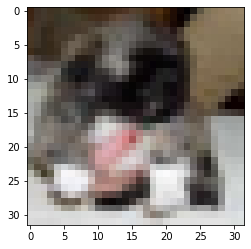

Label: 5


In [6]:
plt.imshow(x_train[5])
plt.show()
print('Label:', y_train[5][0])

In [7]:
num_classes = 10

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print('y_train shape:', y_train.shape)
print('y_val shape:', y_val.shape)
print('y_test shape:', y_test.shape)

print('y_train:', y_train)
print('y_val:', y_val)
print('y_test:', y_test)

y_train shape: (7500, 10)
y_val shape: (1250, 10)
y_test shape: (1250, 10)
y_train: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_val: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_test: [[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]]


In [8]:
model = Sequential()
model.add(Conv2D(8, (3, 3), input_shape=(32, 32, 3))) # 30 30 8
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # 15 15 4
# model.add(Dropout(0.25))

model.add(Conv2D(16, (4, 4))) # 12 12 8
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # 6 6 8
# model.add(Dropout(0.5))

model.add(Conv2D(32, (5, 5))) # 2 2 16
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # 1 1 16
# model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(32))
model.add(Activation('relu'))
# model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 8)         224       
_________________________________________________________________
activation (Activation)      (None, 30, 30, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 16)        2064      
_________________________________________________________________
activation_1 (Activation)    (None, 12, 12, 16)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 32)          1

In [10]:
# initiate Adam optimizer
opt = keras.optimizers.Adam(lr=0.005)

# Let's train the model using Adam
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_val /= 255.0
x_test /= 255.0

if not os.path.exists('saved_cnn_models'):
    os.mkdir('saved_cnn_models')

num_epochs = 16
filepath = 'saved_cnn_models/model-{epoch:05d}.h5'
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=False, save_weights_only=False, mode='auto', period=1)
callbacks_list = [checkpoint]

In [11]:
history = model.fit(x=x_train, y=y_train, batch_size=250, epochs=num_epochs, verbose=1, callbacks=callbacks_list,
              validation_data=(x_val, y_val))

Epoch 1/16
30/30 [==============================] - 33s 15ms/step - loss: 2.2564 - accuracy: 0.1436 - val_loss: 2.0733 - val_accuracy: 0.1976

Epoch 00001: saving model to saved_cnn_models/model-00001.h5
Epoch 2/16
30/30 [==============================] - 0s 8ms/step - loss: 2.0374 - accuracy: 0.2269 - val_loss: 1.8941 - val_accuracy: 0.2824

Epoch 00002: saving model to saved_cnn_models/model-00002.h5
Epoch 3/16
30/30 [==============================] - 0s 8ms/step - loss: 1.8304 - accuracy: 0.3294 - val_loss: 1.7507 - val_accuracy: 0.3168

Epoch 00003: saving model to saved_cnn_models/model-00003.h5
Epoch 4/16
30/30 [==============================] - 0s 8ms/step - loss: 1.6382 - accuracy: 0.3976 - val_loss: 1.5966 - val_accuracy: 0.4032

Epoch 00004: saving model to saved_cnn_models/model-00004.h5
Epoch 5/16
30/30 [==============================] - 0s 7ms/step - loss: 1.5402 - accuracy: 0.4358 - val_loss: 1.5284 - val_accuracy: 0.4384

Epoch 00005: saving model to saved_cnn_models/mod

In [12]:
history.history

{'accuracy': [0.17679999768733978,
  0.2540000081062317,
  0.3440000116825104,
  0.39800000190734863,
  0.4397333264350891,
  0.47013333439826965,
  0.47893333435058594,
  0.5073333382606506,
  0.5175999999046326,
  0.5357333421707153,
  0.5392000079154968,
  0.553600013256073,
  0.5705333352088928,
  0.5818666815757751,
  0.5889333486557007,
  0.6006666421890259],
 'loss': [2.194324016571045,
  1.9760606288909912,
  1.7808157205581665,
  1.6328235864639282,
  1.531087875366211,
  1.4786219596862793,
  1.429202914237976,
  1.3554880619049072,
  1.348435640335083,
  1.2952266931533813,
  1.2572031021118164,
  1.2303893566131592,
  1.196346640586853,
  1.166350245475769,
  1.1430273056030273,
  1.1196672916412354],
 'val_accuracy': [0.19760000705718994,
  0.2824000120162964,
  0.31679999828338623,
  0.4032000005245209,
  0.438400000333786,
  0.4431999921798706,
  0.45840001106262207,
  0.45680001378059387,
  0.4560000002384186,
  0.46639999747276306,
  0.4560000002384186,
  0.50639998912

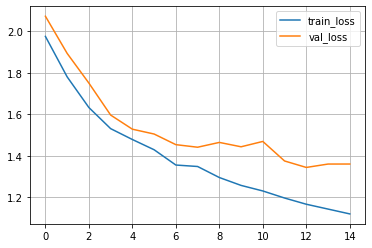

In [13]:
plt.plot(range(num_epochs-1), history.history['loss'][1:], label='train_loss')
plt.plot(range(num_epochs-1), history.history['val_loss'][:-1], label='val_loss')
plt.legend()
plt.grid()
plt.show()

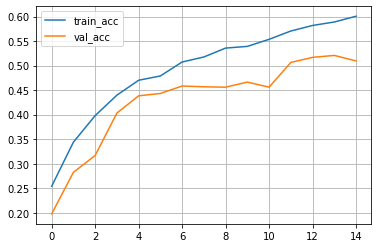

In [14]:
plt.plot(range(num_epochs-1), history.history['accuracy'][1:], label='train_acc')
plt.plot(range(num_epochs-1), history.history['val_accuracy'][:-1], label='val_acc')
plt.legend()
plt.grid()
plt.show()

In [15]:
print('Minimum Validation Loss:', np.min(history.history['val_loss']))
print('Best epoch corresponding to Minimum Validation Loss:', np.argmin(history.history['val_loss'])+1)

Minimum Validation Loss: 1.3438664674758911
Best epoch corresponding to Minimum Validation Loss: 13


In [16]:
model_best = load_model('saved_cnn_models/model-00010.h5')

In [17]:
scores = model_best.evaluate(x_test, y_test, verbose=1)

40/40 [==============================] - 0s 4ms/step - loss: 1.4470 - accuracy: 0.4824


In [18]:
scores

[1.4470486640930176, 0.48240000009536743]

In [19]:
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 1.4470486640930176
Test accuracy: 0.48240000009536743
